In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df =pd.read_csv("Restaurants_of_Mumbai.csv",sep='|')
df.head()

,NAME,PRICE,CUSINE_CATEGORY,CITY,REGION,URL,PAGE NO,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES
0,Hitchki,1200,"Modern Indian,North Indian,Chinese,Momos,Birya...",Mumbai,First International Financial Centre-- Bandra ...,https://www.zomato.com/mumbai/hitchki-bandra-k...,1,Casual Dining,12noon to 130am(Mon-Sun),Excellent,4.9,3529
1,Baba Falooda,400,"Desserts,Ice Cream,Beverages",Mumbai,Mahim,https://www.zomato.com/mumbai/baba-falooda-mah...,1,Dessert Parlor,2pm to 1am(Mon-Sun),Very Good,4.4,1723
2,Chin Chin Chu,1800,"Asian,Chinese",Mumbai,Juhu,https://www.zomato.com/mumbai/chin-chin-chu-ju...,1,Casual Dining,12noon to 1am(Mon-Sun),Very Good,4.2,337
3,Butterfly High,1000,Modern Indian,Mumbai,Bandra Kurla Complex,https://www.zomato.com/mumbai/butterfly-high-b...,1,Bar,12noon to 130am(Mon-Sun),Very Good,4.3,1200
4,BKC DIVE,1200,"North Indian,Chinese,Continental",Mumbai,Bandra Kurla Complex,https://www.zomato.com/mumbai/bkc-dive-bandra-...,1,Bar,1130am to 1am(Mon-Sun),Veľmi dobré,4.4,5995


In [3]:
df.shape

(15081, 12)

In [4]:
df.dtypes

NAME               object
PRICE              object
CUSINE_CATEGORY    object
CITY               object
REGION             object
URL                object
PAGE NO            object
CUSINE TYPE        object
TIMING             object
RATING_TYPE        object
RATING             object
VOTES              object
dtype: object

In [5]:
df['NAME'].unique()

array(['Hitchki', 'Baba Falooda', 'Chin Chin Chu', ..., 'Uncha Otlawala',
       'Mandarin Panda', '\x1a'], dtype=object)

In [6]:
len(df['NAME'].unique())

12720

In [7]:
df.isna().sum()

NAME                0
PRICE               1
CUSINE_CATEGORY     2
CITY                1
REGION              1
URL                 1
PAGE NO             1
CUSINE TYPE         1
TIMING             66
RATING_TYPE         1
RATING              1
VOTES               1
dtype: int64

In [8]:
##Checking for missing and null values:
df.isnull().values.any()

True

In [9]:
df.columns

Index(['NAME', 'PRICE', 'CUSINE_CATEGORY', 'CITY', 'REGION', 'URL', 'PAGE NO',
       'CUSINE TYPE', 'TIMING', 'RATING_TYPE', 'RATING', 'VOTES'],
      dtype='object')

In [10]:
df.drop(['PAGE NO','VOTES'],axis=1,inplace=True)

In [11]:
df.head(2)

,NAME,PRICE,CUSINE_CATEGORY,CITY,REGION,URL,CUSINE TYPE,TIMING,RATING_TYPE,RATING
0,Hitchki,1200,"Modern Indian,North Indian,Chinese,Momos,Birya...",Mumbai,First International Financial Centre-- Bandra ...,https://www.zomato.com/mumbai/hitchki-bandra-k...,Casual Dining,12noon to 130am(Mon-Sun),Excellent,4.9
1,Baba Falooda,400,"Desserts,Ice Cream,Beverages",Mumbai,Mahim,https://www.zomato.com/mumbai/baba-falooda-mah...,Dessert Parlor,2pm to 1am(Mon-Sun),Very Good,4.4


In [12]:

df.dropna(axis='index',subset=['CITY'], inplace=True)
df.dropna(axis='index',subset=['REGION'], inplace=True)
df.dropna(axis='index',subset=['CUSINE TYPE'], inplace=True)
df.dropna(axis='index',subset=['TIMING'], inplace=True)
df.dropna(axis='index',subset=['RATING_TYPE'], inplace=True)
df.dropna(axis='index',subset=['RATING'], inplace=True)
df.dropna(axis='index',subset=['CUSINE_CATEGORY'], inplace=True)

In [13]:
df.isna().sum()

NAME               0
PRICE              0
CUSINE_CATEGORY    0
CITY               0
REGION             0
URL                0
CUSINE TYPE        0
TIMING             0
RATING_TYPE        0
RATING             0
dtype: int64

In [14]:
df.shape

(15014, 10)

In [15]:
df['RATING'].unique()

array(['4.9', '4.4', '4.2', '4.3', '4.5', '4.7', '4.0', '4.6', '4.1',
       'RATING', '3.9', '3.8', '-', '3.6', 'NEW', '3.4', '3.0', '3.7',
       '4.8', '3.3', '3.5', '3.2', '3.1', '2.7', '2.5', '2.8', '2.6',
       '2.3', '2.9', '2.4', '2.1', '2.2', '1.8', '2.0'], dtype=object)

In [16]:
df['RATING'].replace(to_replace = ['RATING','NEW','Opening','nan','-'], value =np.nan,inplace=True)

In [17]:
df['RATING'].unique()

array(['4.9', '4.4', '4.2', '4.3', '4.5', '4.7', '4.0', '4.6', '4.1', nan,
       '3.9', '3.8', '3.6', '3.4', '3.0', '3.7', '4.8', '3.3', '3.5',
       '3.2', '3.1', '2.7', '2.5', '2.8', '2.6', '2.3', '2.9', '2.4',
       '2.1', '2.2', '1.8', '2.0'], dtype=object)

In [18]:
df['RATING']=df['RATING'].astype(float)

In [19]:
df['RATING'].unique()

array([4.9, 4.4, 4.2, 4.3, 4.5, 4.7, 4. , 4.6, 4.1, nan, 3.9, 3.8, 3.6,
       3.4, 3. , 3.7, 4.8, 3.3, 3.5, 3.2, 3.1, 2.7, 2.5, 2.8, 2.6, 2.3,
       2.9, 2.4, 2.1, 2.2, 1.8, 2. ])

In [20]:
df.isna().sum()

NAME                  0
PRICE                 0
CUSINE_CATEGORY       0
CITY                  0
REGION                0
URL                   0
CUSINE TYPE           0
TIMING                0
RATING_TYPE           0
RATING             4253
dtype: int64

In [21]:
df.dropna(axis='index',subset=['RATING'], inplace=True)

In [22]:
df.isna().sum()

NAME               0
PRICE              0
CUSINE_CATEGORY    0
CITY               0
REGION             0
URL                0
CUSINE TYPE        0
TIMING             0
RATING_TYPE        0
RATING             0
dtype: int64

<AxesSubplot:ylabel='NAME'>

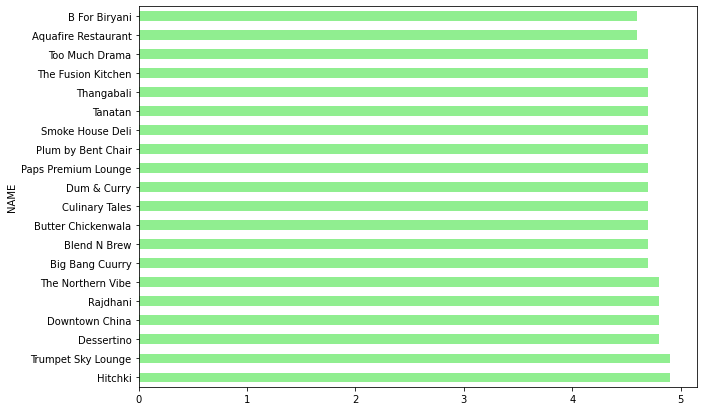

In [23]:

df.groupby('NAME')['RATING'].mean().nlargest(20).plot.barh(figsize=(10,7),linestyle='dotted', color='LightGreen')

In [24]:
top_rating = df.groupby('NAME')['RATING'].mean().to_frame()

In [25]:
top_rating.head()

,RATING
NAME,
#BC Bombiya Corner,3.5
#Heaven's Cafe,3.1
#Pehla Nashaa,3.5
#ThatsCheesy,3.9
#tagmyfood,3.5


In [26]:
top_rating=top_rating.reset_index()

In [27]:
top_rating.columns=['restaurant','rating']

In [28]:
top_rating.head(8)

,restaurant,rating
0,#BC Bombiya Corner,3.5
1,#Heaven's Cafe,3.1
2,#Pehla Nashaa,3.5
3,#ThatsCheesy,3.9
4,#tagmyfood,3.5
5,'N' Cube China Town,2.9
6,+91,4.3
7,1 Above Pizza House,3.2


In [29]:
df.columns

Index(['NAME', 'PRICE', 'CUSINE_CATEGORY', 'CITY', 'REGION', 'URL',
       'CUSINE TYPE', 'TIMING', 'RATING_TYPE', 'RATING'],
      dtype='object')

In [30]:
df['CUSINE_CATEGORY'].unique()

array(['Modern Indian,North Indian,Chinese,Momos,Biryani,Continental,American,Fast Food',
       'Desserts,Ice Cream,Beverages', 'Asian,Chinese', ...,
       'Fast Food,Juices,Street Food',
       'Continental,Italian,Seafood,North Indian,Cafe',
       'Desserts,Chinese,Thai'], dtype=object)

In [31]:
df['CUSINE TYPE'].unique()

array(['Casual Dining', 'Dessert Parlor', 'Bar', 'Café', 'Quick Bites',
       'Bakery', 'Sweet Shop', 'none', 'Food Court', 'Fine Dining',
       'Beverage Shop', 'Pub', 'Food Truck', 'Dhaba', 'Lounge', 'Kiosk',
       'Microbrewery', 'Paan Shop', 'Irani Cafe', 'Confectionery', 'Mess',
       'Bhojanalya'], dtype=object)

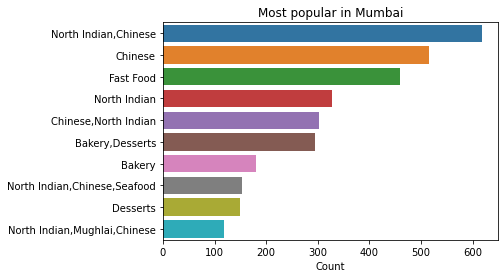

In [32]:
popular=df['CUSINE_CATEGORY'].value_counts()[:10]
sns.barplot(popular,popular.index)
plt.xlabel('Count')
plt.title("Most popular in Mumbai");

Text(0.5, 0, 'Number of outlets')

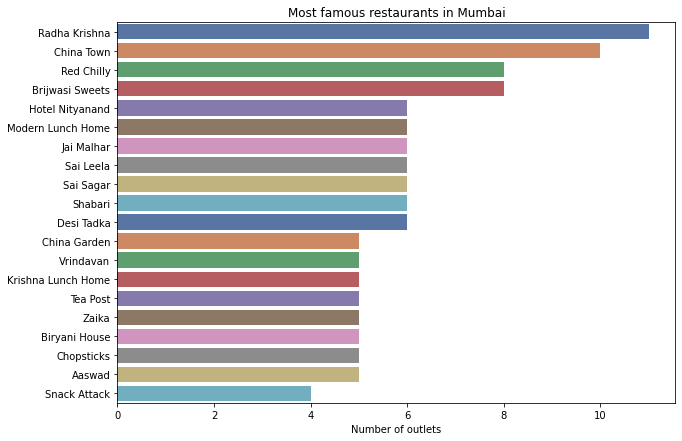

In [33]:
plt.figure(figsize=(10,7))
mumbai=df['NAME'].value_counts()[0:20]
sns.barplot(x=mumbai,y=mumbai.index,palette='deep')
plt.title("Most famous restaurants in Mumbai")
plt.xlabel("Number of outlets") 

In [34]:
df['REGION'].tail()

15075    Oshiwara-- Andheri West
15076             Kandivali West
15077                Lower Parel
15078             Kandivali West
15079                 Malad West
Name: REGION, dtype: object

In [35]:
df.groupby('REGION')['NAME'].unique()

REGION
4 Bungalows                     [Tosha, Pastovilla, Goila Butter Chicken, Happ...
7 Bungalows-- Andheri West      [Star Of China, WTF!, Rodeo Pizza, Swadesh, Cu...
Abbott Hotel-- Vashi            [The Creek - Abbott Hotel, The Cottage Bar - A...
Airoli                          [West Coast Grill, Meating Square, Mojo Pizza ...
Alibaug                         [Kikis Cafe & Deli, Hashtag Bistro Cafe, Hotel...
                                                      ...                        
Wadala                          [Monginis, Not Just Desserts By Sabina, Pancha...
Wagle Estate-- Thane West       [Ranjeet Chinese Pure Veg, Fusion Food Point, ...
Worli                           [Casa De Cafe, Jugaadi Adda, Sin City, City Ba...
Xperia Mall-- Dombivali East    [East Asia Spice Company, Blissful Bites, The ...
Yogi Midtown-- Turbhe                                           [Naans & Noodles]
Name: NAME, Length: 237, dtype: object

In [36]:
resta=[]
location=[]
for key,location_df in df.groupby('REGION'):
    location.append(key)
    resta.append(len(location_df['NAME'].unique()))

In [37]:
df_total=pd.DataFrame(resta,location)


In [38]:

df_total.head()

,0
4 Bungalows,66
7 Bungalows-- Andheri West,56
Abbott Hotel-- Vashi,2
Airoli,151
Alibaug,10


In [39]:
df_total=df_total.reset_index()

In [40]:
df_total.head()

,index,0
0,4 Bungalows,66
1,7 Bungalows-- Andheri West,56
2,Abbott Hotel-- Vashi,2
3,Airoli,151
4,Alibaug,10


In [41]:
df_total.columns=['Location','Restaurants']

In [42]:
df_total.head()

,Location,Restaurants
0,4 Bungalows,66
1,7 Bungalows-- Andheri West,56
2,Abbott Hotel-- Vashi,2
3,Airoli,151
4,Alibaug,10


In [43]:
df_total.set_index('Location',inplace=True)

In [44]:
df_total.head()

,Restaurants
Location,
4 Bungalows,66
7 Bungalows-- Andheri West,56
Abbott Hotel-- Vashi,2
Airoli,151
Alibaug,10


<AxesSubplot:ylabel='Location'>

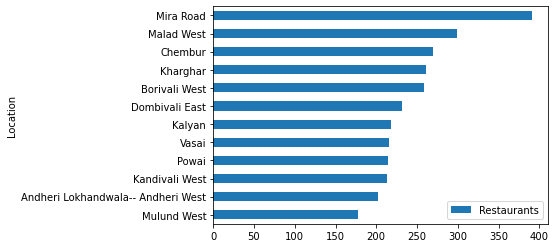

In [45]:
df_total.sort_values(by='Restaurants').tail(12).plot.barh()

In [46]:
df['PRICE'].isna().sum()

0

In [47]:
df['PRICE'].unique()

array(['1200', '400', '1800', '1000', '800', '1300', '1500', '600',
       '1400', '1100', '2000', '350', '900', '700', '500', '1600', '150',
       '300', '550', '450', '650', '750', '250', '200', '850', '100',
       '2500', '1450', '180', '950', '1700', '1900', '2600', '2400',
       '3000', '1250', '3200', '505', '2200', '1050', '1650', '1350',
       '50', '920', '1150', '1550', '3500', '398', '5000', '120', '160',
       '5', '480', '2100', '580', '1850', '220', '249', '2300', '360',
       '248', '2700'], dtype=object)

In [48]:
df['PRICE'].head()

0    1200
1     400
2    1800
3    1000
4    1200
Name: PRICE, dtype: object

In [49]:
#Cheapest rate
df['PRICE'].min()

'100'

In [50]:
#for minimum rate(cheapest restaurants):

df[df['PRICE']== '100'].head()

,NAME,PRICE,CUSINE_CATEGORY,CITY,REGION,URL,CUSINE TYPE,TIMING,RATING_TYPE,RATING
141,Laxman's Om Vada Pav,100,Street Food,Mumbai,Ghatkopar East,https://www.zomato.com/mumbai/laxmans-om-vada-...,Quick Bites,"Closed(Mon),9am to 930pm(Tue-Sun)",Very Good,4.0
270,Ashok Vada Pav Stall,100,Street Food,Mumbai,Prabhadevi,https://www.zomato.com/mumbai/ashok-vada-pav-s...,Quick Bites,"11am to 930pm(Mon-Sat),Closed(Sun)",Very Good,4.4
461,Enrich Ice Cream,100,Ice Cream,Mumbai,Goregaon East,https://www.zomato.com/mumbai/enrich-ice-cream...,Dessert Parlor,11am to 11pm(Mon-Sun),Very Good,4.2
560,D' Comfort Gourmet,100,Fast Food,Mumbai,New Panvel,https://www.zomato.com/mumbai/d-comfort-gourme...,Kiosk,1130am to 930pm(Mon-Sun),Good,3.7
706,A1 Samosa,100,Street Food,Mumbai,Sion,https://www.zomato.com/mumbai/a1-samosa-sion/info,Quick Bites,11am to 11pm(Mon-Sun),Good,3.8


In [51]:
#maximum rate
df['PRICE'].max()

'950'

In [52]:
#for maximum rate(max price restaurants):

df[df['PRICE']== '950'].head()

,NAME,PRICE,CUSINE_CATEGORY,CITY,REGION,URL,CUSINE TYPE,TIMING,RATING_TYPE,RATING
401,Spize & Grillz,950,"Mughlai,Chinese",Mumbai,CBD-Belapur,https://www.zomato.com/mumbai/spize-grillz-cbd...,Casual Dining,11am to 1230AM(Mon-Sun),Good,3.7
587,Kaffeine,950,"Cafe,Continental,Italian,Desserts,Chinese",Mumbai,Borivali West,https://www.zomato.com/mumbai/kaffeine-borival...,Café,11am to 12midnight(Mon-Sun),Very Good,4.0
727,The Punjabi's Kitchen,950,"North Indian,Chinese,Thai",Mumbai,Chakala,https://www.zomato.com/mumbai/the-punjabis-kit...,Casual Dining,1130am to 1230AM(Mon-Sun),Very Good,4.1
773,China Spice,950,"Chinese,Seafood,Thai",Mumbai,Dadar West,https://www.zomato.com/mumbai/china-spice-dada...,Casual Dining,"1130am to 330pm,7pm to 1130pm(Mon-Sun)",Very Good,4.0
1331,Kikis Cafe & Deli,950,"Cafe,American,Asian,Bakery,Biryani,Chinese,Des...",Mumbai,Alibaug,https://www.zomato.com/mumbai/kikis-cafe-deli-...,Café,9am to 930pm(Mon-Sun),Very Good,4.2


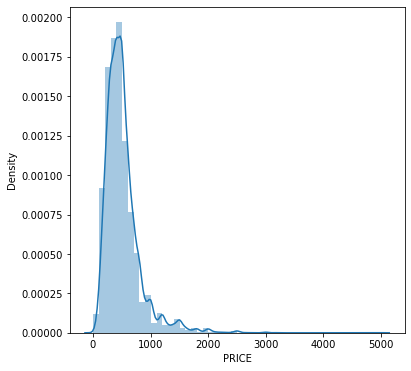

In [53]:
plt.figure(figsize=(6,6))
sns.distplot(df['PRICE'])
plt.show()

In [54]:
df["RATING_TYPE"] = df["RATING_TYPE"].str.lower()
df[['RATING_TYPE', 'CUSINE_CATEGORY']].sample(5)

,RATING_TYPE,CUSINE_CATEGORY
6326,good,Chinese
4123,average,"North Indian,Chinese,Beverages"
12256,very good,"Chinese,North Indian,Continental,Mexican"
48,excellent,"Pizza,Fast Food"
5239,average,"Chinese,South Indian,North Indian"


In [55]:
df['RATING_TYPE'].unique()

array(['excellent', 'very good', 'veľmi dobré', 'good', 'velmi dobré',
       'average', 'excelente', 'muito bom', 'poor', 'skvělá volba',
       'çok iyi', 'baik', 'bardzo dobrze', 'bom', 'média', 'dobrze',
       'buono', 'i̇yi', 'bueno', 'ortalama', 'skvělé', 'biasa', 'průměr',
       'sangat baik', 'priemer', 'dobré', 'promedio', 'muy bueno',
       'media'], dtype=object)

In [56]:
allrestaurant = list(df['NAME'].unique())
allrestaurant

['Hitchki',
 'Baba Falooda',
 'Chin Chin Chu',
 'Butterfly High',
 'BKC  DIVE',
 'Flea Bazaar Café',
 'Persian Darbar',
 'Tanatan',
 'Cafe Safar',
 'Plum by Bent Chair',
 'Angrezi Dhaba',
 'Raasta',
 'Todi Mill Social',
 'Burn - Bar & Kitchen',
 '145 Bandra',
 'Cafe Zoe',
 'Ustaadi',
 'Cafe Maaz',
 "Carter's Blue",
 'Rajasthan',
 "Harry's Bar + Cafe",
 'New Ajwa Family Restaurant',
 'Singh Saab',
 'Kasbah Grand',
 'Elementaria Bakery Cafe',
 'Angrezi Patiyalaa',
 'Door No.1',
 'Natural Ice Cream',
 'Punjab Grill',
 'Locco Eatery & Bar',
 'Breadkart',
 'The Lemon Grass',
 'Chote Nawab',
 'Hari Om Sai',
 'Persian Hub Family Restaurant',
 'Magdalena',
 'United Food Nation',
 'Frisbees',
 'Bombay Vintage',
 'Arya Bhavan',
 'Chaubara 601',
 "Queen Margherita's Pizzeria",
 'The Burger Brasserie',
 'Spice Republic',
 'Fleur - The Fern Goregaon',
 'Cat Café Studio',
 'Thotrin Cafe',
 'Udipi Vihar',
 'B MAD - The Restaurant',
 'Landmark Restaurant Veg Diet',
 'Matka Khichdi',
 'Aavakay',
 'Litt

In [57]:
df.set_index('NAME', inplace=True)

In [58]:
indices = pd.Series(df.index)

In [59]:

from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

In [60]:
tfidf = TfidfVectorizer(analyzer='word', ngram_range=(1, 2), min_df=0)
tfidf_matrix = tfidf.fit_transform(df['RATING_TYPE'])

In [61]:
from sklearn.metrics.pairwise import linear_kernel
cosine_similarities = linear_kernel(tfidf_matrix, tfidf_matrix)

In [62]:
df.columns

Index(['PRICE', 'CUSINE_CATEGORY', 'CITY', 'REGION', 'URL', 'CUSINE TYPE',
       'TIMING', 'RATING_TYPE', 'RATING'],
      dtype='object')

In [63]:
def recommend(NAME, cosine_similarities = cosine_similarities):
    
    # Create a list to put top restaurants
    recommend_restaurant = []
    
    # Find the index of the hotel entered
    idx = indices[indices == NAME].index[0]
    
    # Find the restaurants with a similar cosine-sim value and order them from bigges number
    score_series = pd.Series(cosine_similarities[idx]).sort_values(ascending=False)
    
    # Extract top 10 restaurant indexes with a similar cosine-sim value
    top10_indexes = list(score_series.iloc[0:11].index)
    
    
    for each in top10_indexes:
        recommend_restaurant.append(list(df.index)[each])
    
   
    df_new = pd.DataFrame(columns=['CUSINE_CATEGORY', 'RATING_TYPE', 'PRICE','URL'])
    
    
    for each in recommend_restaurant:
        df_new = df_new.append(pd.DataFrame(df[['CUSINE_CATEGORY','RATING_TYPE', 'PRICE','URL']][df.index == each].sample()))
    
    
    df_new = df_new.drop_duplicates(subset=['CUSINE_CATEGORY','RATING_TYPE', 'PRICE','URL'], keep=False)
    df_new = df_new.sort_values(by='RATING_TYPE', ascending=False).head(10)
    
    print('TOP %s RESTAURANTS LIKE " %s " that you must try: ' % (str(len(df_new)), NAME))
    
    return df_new

In [64]:
# HERE IS A RANDOM RESTAURANT. LET'S SEE THE DETAILS ABOUT THIS RESTAURANT:
df[df.index == 'Kalvan'].head()

,PRICE,CUSINE_CATEGORY,CITY,REGION,URL,CUSINE TYPE,TIMING,RATING_TYPE,RATING
NAME,,,,,,,,,
Kalvan,350,"Seafood,Maharashtrian",Mumbai,Goregaon East,https://www.zomato.com/mumbai/kalvan-goregaon-...,Casual Dining,11am to 12midnight(Mon-Sun),good,3.5


In [65]:
recommend('PitaBurg')

TOP 10 RESTAURANTS LIKE " PitaBurg " that you must try: 


,CUSINE_CATEGORY,RATING_TYPE,PRICE,URL
Food Village,"Chinese,North Indian,Mughlai,Seafood",good,850,https://www.zomato.com/mumbai/food-village-dom...
Night Fusion Restaurant,"Chinese,North Indian",average,400,https://www.zomato.com/mumbai/night-fusion-res...
Rasik Fast Food,Fast Food,average,300,https://www.zomato.com/mumbai/rasik-fast-food-...
Charcoal Bytes,"Biryani,North Indian",average,400,https://www.zomato.com/mumbai/charcoal-bytes-b...
Kullcha King,North Indian,average,250,https://www.zomato.com/mumbai/kullcha-king-gir...
Pizza Cube Cafe,Italian,average,500,https://www.zomato.com/mumbai/pizza-cube-cafe-...
Foodania,"North Indian,South Indian,Chinese",average,400,https://www.zomato.com/mumbai/foodania-veera-d...
Mansha,Mithai,average,200,https://www.zomato.com/mumbai/mansha-kandivali...
The Spice Kitchen,"North Indian,Chinese",average,500,https://www.zomato.com/mumbai/the-spice-kitche...
Bell Pepper,"Chinese,Thai,North Indian",average,600,https://www.zomato.com/mumbai/bell-pepper-1-va...


In [66]:
recommend('Thangabali')

TOP 10 RESTAURANTS LIKE " Thangabali " that you must try: 


,CUSINE_CATEGORY,RATING_TYPE,PRICE,URL
Hitchki,"Modern Indian,North Indian,Chinese,Momos,Birya...",excellent,1200,https://www.zomato.com/mumbai/hitchki-bandra-k...
Big Bang Cuurry,"North Indian,Biryani,Rolls",excellent,350,https://www.zomato.com/mumbai/big-bang-cuurry-...
Too Much Drama,"Fast Food,Roast Chicken,BBQ",excellent,600,https://www.zomato.com/mumbai/too-much-drama-v...
Lilt,"Asian,Chinese,Burmese,Thai",excellent,1500,https://www.zomato.com/mumbai/lilt-lower-parel...
Harsh's Bistro,"Chinese,Continental",excellent,800,https://www.zomato.com/mumbai/harshs-bistro-ma...
Dhadak Resto Bar,"North Indian,Chinese,Continental",excellent,1000,https://www.zomato.com/mumbai/dhadak-resto-bar...
Jazz & Blues,"Cafe,Pizza,Italian",excellent,500,https://www.zomato.com/mumbai/jazz-blues-andhe...
Drifters Tap Station,"North Indian,Continental,European,American",excellent,2000,https://www.zomato.com/mumbai/drifters-tap-sta...
Little West Pizza,Pizza,excellent,600,https://www.zomato.com/mumbai/little-west-pizz...
Zaika Restaurant & Party Hall,"North Indian,Chinese,Beverages",excellent,1000,https://www.zomato.com/zaikabhayander/info


In [67]:
recommend('Family Tree')

TOP 10 RESTAURANTS LIKE " Family Tree " that you must try: 


,CUSINE_CATEGORY,RATING_TYPE,PRICE,URL
Hitchki,"Modern Indian,North Indian,Chinese,Momos,Birya...",excellent,1200,https://www.zomato.com/mumbai/hitchki-bandra-k...
Big Bang Cuurry,"North Indian,Biryani,Rolls",excellent,350,https://www.zomato.com/mumbai/big-bang-cuurry-...
Too Much Drama,"Fast Food,Roast Chicken,BBQ",excellent,600,https://www.zomato.com/mumbai/too-much-drama-v...
Lilt,"Asian,Chinese,Burmese,Thai",excellent,1500,https://www.zomato.com/mumbai/lilt-lower-parel...
Harsh's Bistro,"Chinese,Continental",excellent,800,https://www.zomato.com/mumbai/harshs-bistro-ma...
Dhadak Resto Bar,"North Indian,Chinese,Continental",excellent,1000,https://www.zomato.com/mumbai/dhadak-resto-bar...
Jazz & Blues,"Cafe,Pizza,Italian",excellent,500,https://www.zomato.com/mumbai/jazz-blues-andhe...
Drifters Tap Station,"North Indian,Continental,European,American",excellent,2000,https://www.zomato.com/mumbai/drifters-tap-sta...
Little West Pizza,Pizza,excellent,600,https://www.zomato.com/mumbai/little-west-pizz...
Zaika Restaurant & Party Hall,"North Indian,Chinese,Beverages",excellent,1000,https://www.zomato.com/zaikabhayander/info


In [68]:
recommend('Chin Chin Chu')

TOP 10 RESTAURANTS LIKE " Chin Chin Chu " that you must try: 


,CUSINE_CATEGORY,RATING_TYPE,PRICE,URL
Say Cheese,"Rolls,Pizza,Mexican,Fast Food",very good,350,https://www.zomato.com/mumbai/say-cheese-charn...
The Burrrp Cafe,"Fast Food,Chinese,Momos,Italian,Burger",very good,800,https://www.zomato.com/mumbai/the-burrrp-cafe-...
Poolside - VITS Hotel,Continental,very good,1500,https://www.zomato.com/mumbai/poolside-vits-ho...
Nau Se Barah 9/12,"North Indian,Continental",very good,1300,https://www.zomato.com/mumbai/nau-se-barah-9-1...
Sion Lunch Home,"Mangalorean,Chinese,North Indian,Seafood",very good,800,https://www.zomato.com/mumbai/sion-lunch-home-...
Northern Tadka,"North Indian,Mughlai",very good,1000,https://www.zomato.com/mumbai/northern-tadka-1...
BOMB’AR,"Continental,North Indian,Italian",very good,1400,https://www.zomato.com/mumbai/bombar-goregaon-...
Frugurpop,Ice Cream,very good,150,https://www.zomato.com/mumbai/frugurpop-pali-h...
The Appetite Momos,"Chinese,Momos,Fast Food,Tibetan,Asian",very good,200,https://www.zomato.com/mumbai/the-appetite-mom...
Greek Gyros,"Healthy Food,Lebanese,Wraps,Juices,Salad,Greek...",very good,600,https://www.zomato.com/mumbai/greek-gyros-manp...
